# XKCD Plots have Landed in Matplotlib!

*This notebook was originally a post by Jake Vanderplas on*
[*Pythonic Perambulations*](http://jakevdp.github.io)

<!-- PELICAN_BEGIN_SUMMARY -->
One of the most consistently popular posts on this blog has been my
[XKCDify](http://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/) post,
where I followed in the footsteps of others to write a little hack for xkcd-style plotting
in matplotlib.  In it, I mentioned the [Sketch Path Filter](https://github.com/matplotlib/matplotlib/pull/1329)
pull request that would eventually supersede my ugly little hack.

Well, "eventually" has finally come.  Observe:

In [1]:
%pylab inline

# import matplotlib.pyplot
# import matplotlib.font_manager
# matplotlib.font_manager._rebuild()
# matplotlib.font_manager.findfont('Humor Sans')


Matplotlib is building the font cache; this may take a moment.


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Whoo Hoo!!!')

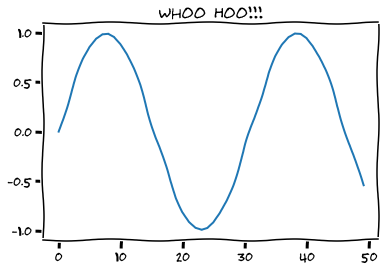

In [2]:
plt.xkcd()  # Yes...
plt.plot(sin(linspace(0, 10)))
plt.title('Whoo Hoo!!!')

The ``plt.xkcd()`` function enables some rcParam settings which can automatically convert
**any** matplotlib plot into XKCD style.  You can peruse the matplotlib xkcd gallery
[here](http://matplotlib.org/xkcd/gallery.html) for inspiration, or read on where I'll
show off some of my favorite of the possibilities.

<!-- PELICAN_END_SUMMARY -->

*By the way, this new functionality requires matplotlib version 1.3, which can currently
be downloaded and installed from [github](http://github.com/matplotlib/matplotlib).
Also, if you want to have the font match above, be sure to download and install the
[Humor Sans](http://xkcdsucks.blogspot.com/2009/03/xkcdsucks-is-proud-to-present-humor.html)
font on your system.  For matplotlib to recognize it, you may have to remove the font cache,
found on your system at*

    $HOME/.matplotlib/fontList.cache

Even simple plots can be made much more interesting:

Text(0, 0.5, "I don't even know")

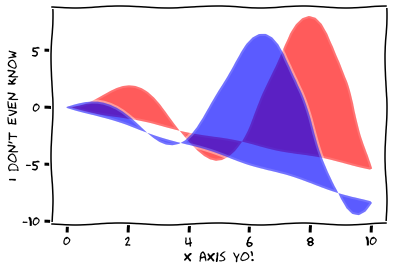

In [3]:
x = np.linspace(0, 10)
y1 = x * np.sin(x)
y2 = x * np.cos(x)

plt.fill(x, y1, 'red', alpha=0.4)
plt.fill(x, y2, 'blue', alpha=0.4)
plt.xlabel('x axis yo!')
plt.ylabel("I don't even know")

3D plots work as well:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


(0.0, 1.0)

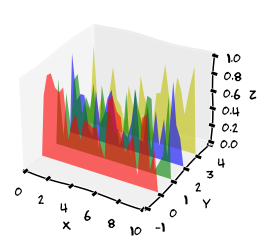

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 10, 30)
colors = ['r', 'g', 'b', 'y']
y = np.random.random((len(colors), len(x)))
y[:, 0] = y[:, -1] = 0

edges = [list(zip(x, yi)) for yi in y]

poly = PolyCollection(edges, facecolors=colors, alpha=0.6)
ax.add_collection3d(poly, zs=range(4), zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

We can use the new package to quickly reproduce a [recent XKCD comic](http://xkcd.com/1235/):

Text(0.5, 0, "In the last few years, with very little fanfare,\nWe've conclusively settled the questions of\nflying saucers, lake monsters, ghosts, and bigfoot.")

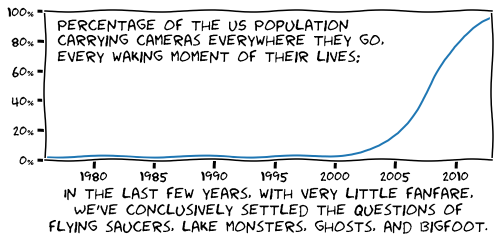

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(211)

years = np.linspace(1975, 2013)
pct = 2 + 98. / (1 + np.exp(0.6 * (2008 - years)))
ax.plot(years, pct)

ax.set_xlim(1976, 2013)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%i%%'))

ax.text(1977, 67,
        ("Percentage of the US Population\n"
         "carrying cameras everywhere they go,\n"
         "every waking moment of their lives:"),
        size=16)

ax.set_xlabel(("In the last few years, with very little fanfare,\n"
               "We've conclusively settled the questions of\n"
               "flying saucers, lake monsters, ghosts, and bigfoot."),
              size=16)

And as my favorite example, we can recreate any of the animations I've
shown in this blog, making them xkcd-style with a simple ``plt.xkcd()``
annotation.  Below you can see the double-pendulum animation from
[this post](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/),
rendered using the XKCD sketch path:

In [6]:
from IPython.display import HTML
url = 'http://jakevdp.github.io/downloads/videos/double_pendulum_xkcd.mp4'
HTML('<video controls alt="animation" src="{0}">'.format(url))

The code used to create this movie can be downloaded
[here](http://jakevdp.github.io/downloads/code/double_pendulum_xkcd.py)

This addition to matplotlib is much more flexible than the little hack I wrote last fall;
I hope you have fun playing with it.  And as someone quipped at the Scipy conference in June,
"First one to get an XKCD plot in a Nature paper wins!"

*This post was written entirely as an IPython notebook. The full notebook can be downloaded*
[*here*](http://jakevdp.github.io/downloads/notebooks/XKCD_sketch_path.ipynb),
*or viewed statically on*
[*nbviewer*](http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/XKCD_sketch_path.ipynb)